# U.S. Medical Insurance Costs

**Goal**: To import,  organize and analyze the data to answer real world questions about the correlation between the metrics provided and health insurance cost 
<br>***Metrics Provided***: Age, Sex, Number of children, Smoker?, Region, and Cummlative insurance charges.
<br> ***Analysis***: <br> 1. Which age group has the most smokers?
<br>2. Does a higher age influence your insurance charges?
<br> 3. Does being a smoker influence your insurance charges?


In [37]:
#importing required libraries
import csv
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import numpy as np

In [38]:
#display sample rows of insurance.csv
insurance = pd.read_csv('insurance.csv')
print(insurance)
pd.

      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]


In [39]:
# create empty list to store columns from insurance.csv
age_strs = []
sex_list = []
smoker_list = []
bmi_strs = []
children_strs = []
region_list = []
charges_strs = []

with open("insurance.csv") as insurance_csv:
    insurance_file = csv.DictReader(insurance_csv)
    
    for row in insurance_file:
        age_strs.append(row['age'])
        smoker_list.append(row['smoker'])
        sex_list.append(row['sex'])
        region_list.append(row['region'])
        children_strs.append(row['children'])
        charges_strs.append(row['charges'])
        bmi_strs.append(row['bmi'])

In [40]:
# converts string elements to nums in list form
def convert_list_to_num(str_list):
    converted_list = []
    for num in str_list:
        converted_list.append(float(num))
    return converted_list


Since we will be doing numerical calculations, we should first convert the nessasary list of strings into list of numerical values

In [41]:
# create new list of numerical values
age_floats = convert_list_to_num(age_strs)
bmi_floats = convert_list_to_num(bmi_strs)
children_floats = convert_list_to_num(children_strs)
charges_floats = convert_list_to_num(charges_strs)

Here we begin answering our first question: Which age group has the most smokers? ***(1)***

In [42]:
# calculate the number of smokers in each age group: young adults(18-39), middle adults(40-59), older adults(60+)
young_count = 0
middle_count = 0
older_count = 0
most_smokers = ""
total_smokers = 0
max = 0

for person in range(len(age_floats)):
    if age_floats[person] >= 60 and smoker_list[person] == "yes":
        older_count += 1
    elif age_floats[person] in range(40,60) and smoker_list[person] == "yes":
        middle_count += 1
    elif  age_floats[person] in range(18,40) and smoker_list[person] == "yes":
        young_count += 1
total_smokers = older_count + middle_count + young_count

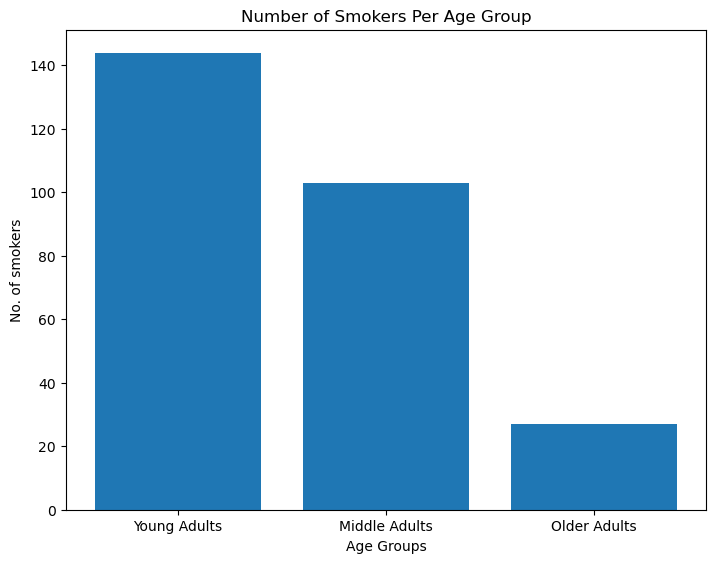

In [43]:
# Determine who had the most smokers
if older_count >= young_count and older_count >= middle_count:
    max = older_count
    most_smokers = "older adults"
    
elif middle_count >= older_count and middle_count >=young_count:
    max = middle_count
    most_smokers = "middle adults"
else: max = young_count
most_smokers = "young adults"
percentage = "{:.2%}".format(max / total_smokers)


# create a bar graph to show number of smokers
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x_axis = ['Young Adults', 'Middle Adults', 'Older Adults']
y_axis = [young_count, middle_count, older_count]
ax.bar(x_axis,y_axis)
plt.xlabel("Age Groups")
plt.ylabel( 'No. of smokers')
plt.title('Number of Smokers Per Age Group')
plt.show()

In [44]:
print (""""Conclusion: The age group with the most smokers is the {} with {} smokers or {} of all smokers.
As Shown by the graph above, the number of smokers declined as the age group increased""".format(most_smokers, max, percentage))

"Conclusion: The age group with the most smokers is the young adults with 144 smokers or 52.55% of all smokers.
As Shown by the graph above, the number of smokers declined as the age group increased


 ***2)*** Next, We want to investigate whether a higher age influences your insurance cost.
To do so, we'll use the same age ranges used above: _Young Adults(18-39), Middle Adults(40-59), Older Adults(60+)_

In [45]:
# Helper function for getting the average of a list of intergers
def get_avg(int_list):
    sum = 0
    for i in int_list:
        sum += i
    
    average = round(sum / len(int_list),2)
    return average

In [46]:
# calculate the average insurance cost for each age group

young_avgs = []
middle_avgs = []
older_avgs = []

for age in range(len(age_floats)):
    if age_floats[age] >= 60:
        older_avgs.append(charges_floats[age])
    elif age_floats[age] in range(40,60):
        middle_avgs.append(charges_floats[age])
    elif age_floats[age] in range(18,40):
        young_avgs.append(charges_floats[age])
        
# Checks for error in calculations
if (len(young_avgs) + len(middle_avgs) + len(older_avgs)) != 1338:
    print ("ERROR in calculating insurance charge averages")

young_avg_charges = get_avg(young_avgs)
middle_avg_charges = get_avg(middle_avgs)
older_avg_charges = get_avg(older_avgs)

print("The averages are as follows: ")

The averages are as follows: 


In [47]:
# create a dataframe to display averages

averages = [["Young Adults", '$' + str(young_avg_charges)],
            ["Middle-Aged Adults",'$' + str(middle_avg_charges)], 
            ["Older Adults", '$' + str(older_avg_charges)]]

df = pd.DataFrame(averages, columns=['Age Group', 'Average Charge'])
df

,Age Group,Average Charge
0,Young Adults,$10157.22
1,Middle-Aged Adults,$15431.97
2,Older Adults,$21248.02


***Conclusion:*** Based on my findings your age does in fact influence your insurance charges. As showning on the table above, there is in uptrending in insurance charges as we move up into higher age groups.

***3)*** For my final question, I am looking to determine whether smoking increases your insurance charges. To do so, I am analysing the young adult group (18-25) because not only do they possess the least amount of health risk, which would be influential factor to their insurance charges but also between I discovered earlier in this analysis that the young adults have the most smokers.

In [48]:
# Determine the number of smokers vs non-smokers between ages 18-25
yes_count = 0
yes_charge_amount = 0
no_count = 0
no_charge_amount = 0

for age in range(len(age_floats)):
    if age_floats[age] <= 25:
        if smoker_list[age] == "yes":
            yes_count += 1
            yes_charge_amount += charges_floats[age]
        else:
            no_count += 1
            no_charge_amount += charges_floats[age]

yes_avg = round(yes_charge_amount / yes_count,2)
no_avg = round(no_charge_amount / no_count,2)

print("The average insurance for the {} young adults who smoked was ${}".format(yes_count, yes_avg))
print("The average insurance for the {} young adults who did not smoke was ${}".format(no_count, no_avg))

The average insurance for the 65 young adults who smoked was $27933.56
The average insurance for the 241 young adults who did not smoke was $4003.92


***Conclusion:*** The young adults who smoked had overwhelming higher insurance charges.
    Based on the data, one could infer that smokers are more likely to be sicker and have higher insurance charges or more frequent medical bills. 